# 作业三

## 一、Python类

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class DummyData:
    def __init__(self, num=200):
        self.num = num
        
    def load_data(self, train=True):
        W = [0.3, 2, 1]
        if train:
            X = np.linspace(-2, 2, num=self.num)
            Y = W[0]*X**2 + W[1]*X + W[2] + 0.4*np.random.randn(X.size)
        else:
            X = np.linspace(-10, 10, num=self.num)
            Y = W[0]*X**2 + W[1]*X + W[2] + 5*np.random.randn(X.size)
        return X, Y

In [3]:
X_train, Y_train = DummyData(500).load_data()
X_valid, Y_valid = DummyData(200).load_data(train=False)

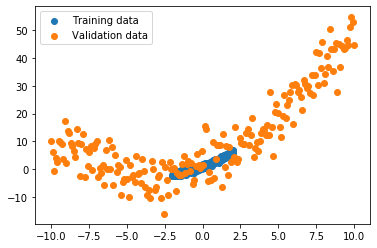

In [4]:
plt.scatter(X_train, Y_train)
plt.scatter(X_valid, Y_valid)
plt.legend(["Training data", "Validation data"])

# 拟合上述曲线

要求：

* 函数$ f(x) = w_0x^2 + w_1x + w_2 $
* 误差采用均方误差 $L := \frac{\sum_{i=1}^{n}(f(X_i) - Y_i)^2}{n}$
* 固定步长的梯度下降法
* 在尽可能不修改代码结构的前提下完成工作
* 利用`X_train, Y_train`拟合，利用`X_valid, Y_valid`来验证拟合的效果

## 定义模型、优化器及误差

In [5]:
# 只需要修改这一部分 -- 代码量在20行以内
class Parabola:
    def __init__(self):
        self.W = np.zeros(3)
        
    def __call__(self, X):
        return self.predict(X)
    
    def predict(self, X):
        """计算f(X)，X为向量"""
        assert len(X.shape)==1
        # 实现它
        return self.W[0]*X**2 + self.W[1]*X + self.W[2]

        
class GradientDescent:
    def __init__(self, step=1e-3):
        self.step = step
        
    def update(self, f:Parabola, dW):
        """利用梯度dW来更新f的权重"""
        # 实现它
#         print("dW ",dW.shape)
        f.W= f.W-self.step* dW
        return f.W
        

def loss(predict, real):
    """计算预测值与真实值之间的误差 L"""
    assert len(real.shape)==1
    assert real.size == predict.size
    # 实现它
    Loss= np.mean(np.square(predict-real))
    return Loss
    
    
def grad(f, X, Y):
    """计算L在X处的关于参数W的导数, 其中Y=f(X)， X、Y均为向量"""
    assert len(X.shape)==1
    n=X.shape[0]
    # 实现它
    return np.array([2/n*(f(X)-Y).dot(k) for k in [np.square(X),X,np.ones(n)]])

## 拟合模型

In [6]:
f = Parabola()
opt = GradientDescent(1e-3)

valid_losses = []
train_losses = []
for i in range(1000):
    X, Y = X_train, Y_train
    
    Y_out = f(X)
    dW = grad(f, X, Y)
    opt.update(f, dW)
#     
    cur_valid_loss = loss(Y_valid, f(X_valid))
    cur_train_loss = loss(Y_out,Y)
    
    valid_losses.append(cur_valid_loss) 
    train_losses.append(cur_train_loss)
    
    if i%50 == 0:
        print(f"Iter {i}: train loss {cur_train_loss}, valid loss {cur_valid_loss}")

Iter 0: train loss 7.421408413075678, valid loss 367.64663830358717
Iter 50: train loss 5.192067526575431, valid loss 164.40707652207195
Iter 100: train loss 3.783942067792783, valid loss 106.82625413785296
Iter 150: train loss 2.8428129456632454, valid loss 101.11213012983677
Iter 200: train loss 2.184626347580758, valid loss 109.66628800870902
Iter 250: train loss 1.7086761420772227, valid loss 118.78755005594574
Iter 300: train loss 1.3564149587817342, valid loss 124.48742806653907
Iter 350: train loss 1.0915816793336097, valid loss 126.4107083261228
Iter 400: train loss 0.8903671709047105, valid loss 125.33217389913321
Iter 450: train loss 0.7363674771754694, valid loss 122.19705355974604
Iter 500: train loss 0.6178654206459889, valid loss 117.80469232098149
Iter 550: train loss 0.5262780580997103, valid loss 112.74418209913802
Iter 600: train loss 0.45521212830758895, valid loss 107.41718471030254
Iter 650: train loss 0.39985364903188236, valid loss 102.08216886239246
Iter 700: tr

## 显示结果

结果不好是正常的 

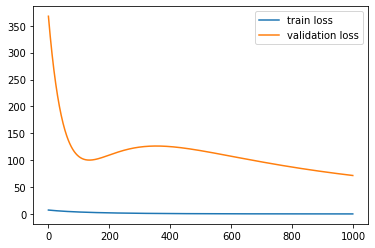

In [7]:
plt.plot(train_losses)
plt.plot(valid_losses)
plt.legend(["train loss", "validation loss"])

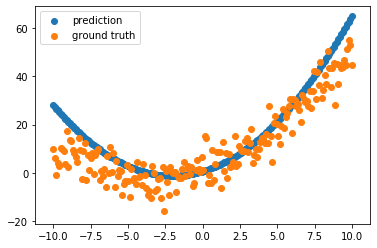

In [8]:
plt.scatter(X_valid, f(X_valid))
plt.scatter(X_valid, Y_valid)
plt.legend(["prediction", "ground truth"])